<a href="https://colab.research.google.com/github/Mookkyduke/NewProjectGroup5/blob/main/New_Project_Group5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**รายชื่อสมาชิก:**
1. 633020374-6 พงศ์พิชา ขจรฟุ้ง   
2. 633020668-9 ณัฏฐ์ชนก พิมพ์ภูคำ


---



### ตัวแปรในข้อมูล

pclass: ระดับชั้นของผู้โดยสาร (1st, 2nd, 3rd class).

survived: สถานะการรอดชีวิต (1 หมายถึงรอดชีวิต, 0
หมายถึงไม่รอดชีวิต).

name: ชื่อของผู้โดยสาร.

sex: เพศของผู้โดยสาร (male หรือ female).

age: อายุของผู้โดยสาร.

sibsp: จำนวนพี่น้องและคู่สมรสที่อยู่บนเรือ.

parch: จำนวนผู้ปกครองหรือเด็กที่เดินทางด้วย.

ticket: เลขตั๋ว.

fare: ค่าโดยสารที่จ่าย.

cabin: หมายเลขห้องนอน (หากมี).

embarked: ท่าเรือที่ผู้โดยสารขึ้นเรือ (C = Cherbourg, Q = Queenstown, S = Southampton).

boat: หมายเลขเรือช่วยชีวิตที่ใช้ (หากรอดชีวิต).

body: หมายเลขศพ (หากไม่รอดชีวิต).

home.dest: ที่อยู่หลักของผู้โดยสาร.


---



## Importing Data

In [263]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
data = pd.read_csv('titanic.csv')
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [265]:
# Saving dataset
df = data.copy()

In [266]:
print(df.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [267]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"คอลัมน์ '{column}':")
    print(unique_values)
    print()

คอลัมน์ 'pclass':
[1 2 3]

คอลัมน์ 'survived':
[1 0]

คอลัมน์ 'name':
['Allen, Miss. Elisabeth Walton' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine' ... 'Zakarian, Mr. Mapriededer'
 'Zakarian, Mr. Ortin' 'Zimmerman, Mr. Leo']

คอลัมน์ 'sex':
['female' 'male']

คอลัมน์ 'age':
[29.      0.9167  2.     30.     25.     48.     63.     39.     53.
 71.     47.     18.     24.     26.     80.         nan 50.     32.
 36.     37.     42.     19.     35.     28.     45.     40.     58.
 22.     41.     44.     59.     60.     33.     17.     11.     14.
 49.     76.     46.     27.     64.     55.     70.     38.     51.
 31.      4.     54.     23.     43.     52.     16.     32.5    21.
 15.     65.     28.5    45.5    56.     13.     61.     34.      6.
 57.     62.     67.      1.     12.     20.      0.8333  8.      0.6667
  7.      3.     36.5    18.5     5.     66.      9.      0.75   70.5
 22.5     0.3333  0.1667 40.5    10.     23.5    34.5    20.5    30.5
 55.5    

In [268]:
print(df.shape)

(1309, 14)


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## Data Cleaning

ทำการตัดคอลัมน์ที่ไม่ได้นำมาใช้ในการวิเคราะห์ออก

In [270]:
df.drop(columns=['name','cabin','embarked', 'boat', 'body', 'home.dest'],inplace=True)

ดูข้อมูลอีกครั้งว่าคอลัมน์ได้ถูกตัดออกหรือยัง

In [271]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare
0,1,1,female,29.0000,0,0,24160,211.3375
1,1,1,male,0.9167,1,2,113781,151.5500
2,1,0,female,2.0000,1,2,113781,151.5500
3,1,0,male,30.0000,1,2,113781,151.5500
4,1,0,female,25.0000,1,2,113781,151.5500


กำหนดตัวแปรเพศใหม่ โดยให้ เพศชาย คือ 1 และเพศหญิง คือ 0

In [272]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['sex'].value_counts()

1    843
0    466
Name: sex, dtype: int64

ทำการเช็คว่ามีตัวแปรไหนมีค่าว่างไหม

In [273]:
df.isna().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
dtype: int64

จะเห็นว่าข้อมูลในตัวแปร age และ fare มีค่าว่างที่ต้องจัดการ


จัดการค่าว่างด้วยการแทนค่าว่างด้วย median

In [274]:
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

In [275]:
df.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
dtype: int64

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   int64  
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1309 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 81.9+ KB


In [277]:
df.describe()

,pclass,survived,sex,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.644003,29.503183,0.498854,0.385027,33.281086
std,0.837836,0.486055,0.478997,12.905246,1.041658,0.865560,51.741500
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,1.000000,80.000000,8.000000,9.000000,512.329200


## Data Visualisation

<ipython-input-278-683040a4ef8d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare'],color='g')
<ipython-input-278-683040a4ef8d>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],color='g')


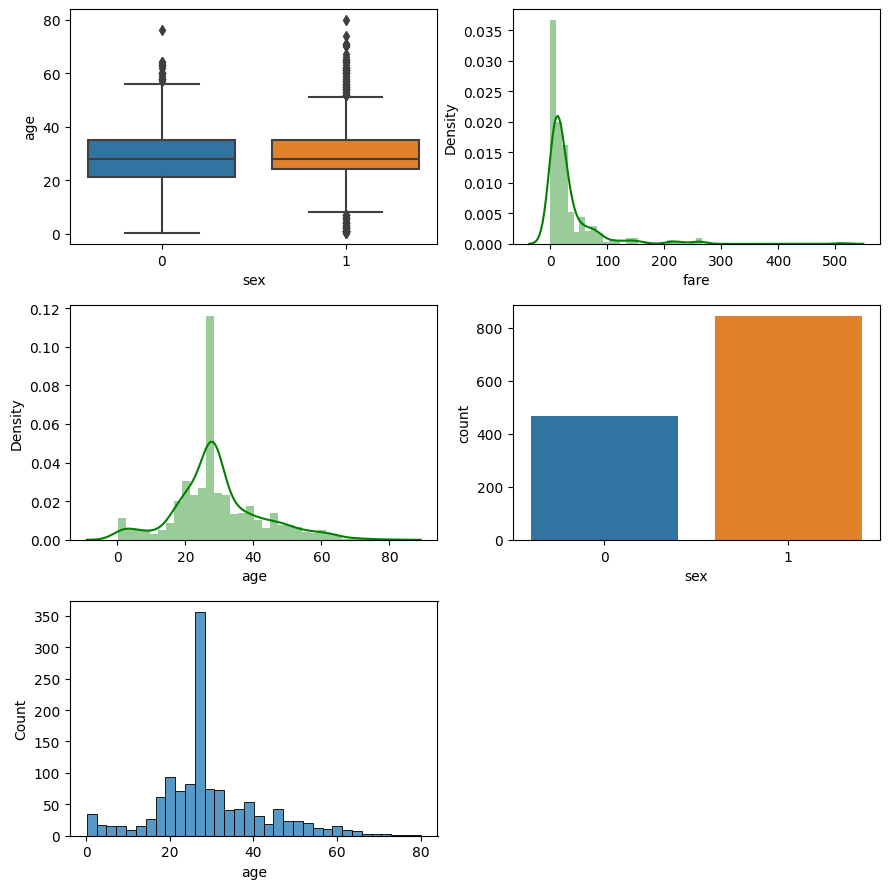

In [278]:
plt.figure(figsize=(9,9))
plt.subplot(3,2,1)
sns.boxplot(x='sex', y = 'age',data= df)
# 'male': 1, 'female': 0

plt.subplot(3,2,2)
sns.distplot(df['fare'],color='g')

plt.subplot(3,2,3)
sns.distplot(df['age'],color='g')

plt.subplot(3,2,4)
sns.countplot(x='sex', data=df)

plt.subplot(3,2,5)
sns.histplot(df['age'])


plt.tight_layout()
plt.show()

ทำการสรุปยอดผู้เสียชีวิตและผู้รอดชีวิตโดยแบ่งตามตัวแปร pclass และ sex

In [279]:
# Pivot tables for categorical features by 'Survived' class
print(pd.pivot_table(df, index='survived', columns='pclass', values='ticket', aggfunc='count'))
print()
print(pd.pivot_table(df, index='survived', columns='sex', values='ticket', aggfunc='count'))

pclass      1    2    3
survived               
0         123  158  528
1         200  119  181

sex         0    1
survived          
0         127  682
1         339  161


สร้างกราฟสรุปข้อมูลเพื่อสรุปผล

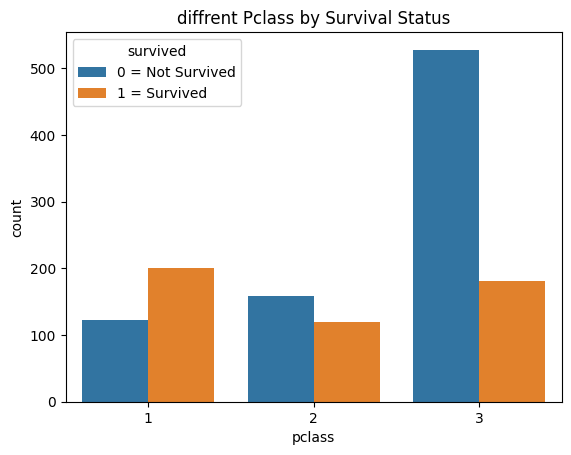

In [280]:
sns.countplot(x='pclass',data=df,hue='survived')
legend_labels = {0: 'Not Survived', 1: 'Survived'}
plt.legend(title='survived', labels=[f"{key} = {value}" for key, value in legend_labels.items()])
plt.title('diffrent Pclass by Survival Status')
plt.show()

จากกราฟจะเห็นว่า ผู้โดยสารที่อยู่ชั้น 3 จะมีโอกาสเสียชีวิตมากที่สุด

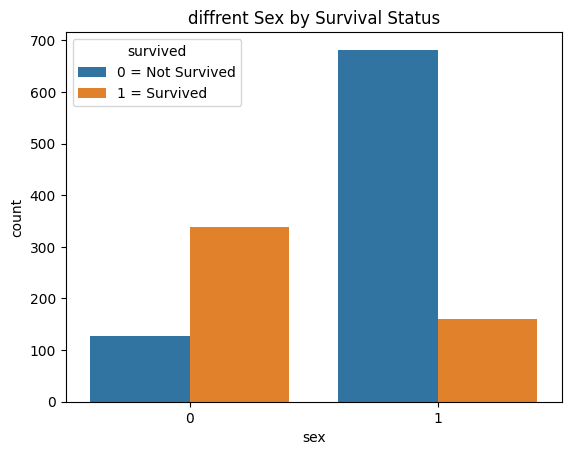

In [281]:
sns.countplot(x='sex',data=df,hue='survived')
legend_labels = {0: 'Not Survived', 1: 'Survived'}
plt.legend(title='survived', labels=[f"{key} = {value}" for key, value in legend_labels.items()])
plt.title('diffrent Sex by Survival Status')
plt.show()

Sex : 0 = female, 1 = male จากกราฟจะเห็นว่าผู้โดยสารเพศชายจะมีโอกาสเสียชีวิตมากกว่าเพศหญิง

<ipython-input-282-464f80b8ebc8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pclass'][df['survived'] == 0], label="Not Survived" , color = 'Blue')
<ipython-input-282-464f80b8ebc8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pclass'][df['survived'] == 1], label="Survived" ,  col

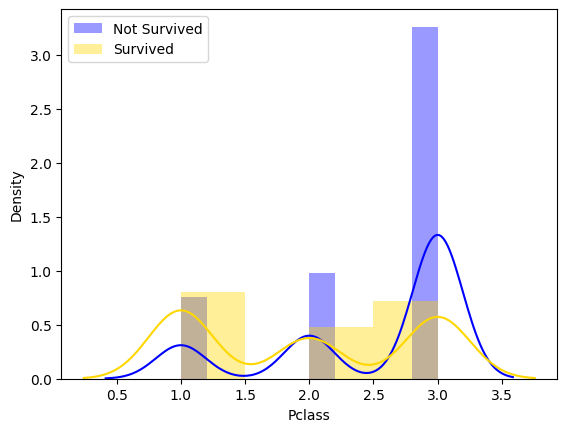

In [282]:
#Distribution plot for 'Pclass'
sns.distplot(df['pclass'][df['survived'] == 0], label="Not Survived" , color = 'Blue')

sns.distplot(df['pclass'][df['survived'] == 1], label="Survived" ,  color = 'Gold')

plt.xlabel('Pclass')
plt.ylabel('Density')

plt.legend()

plt.show()

จากกราฟจะเห็นว่าผู้โดยสารที่อยู่ชั้น 3 มีโอกาสเสยชีวิตมากที่สุด

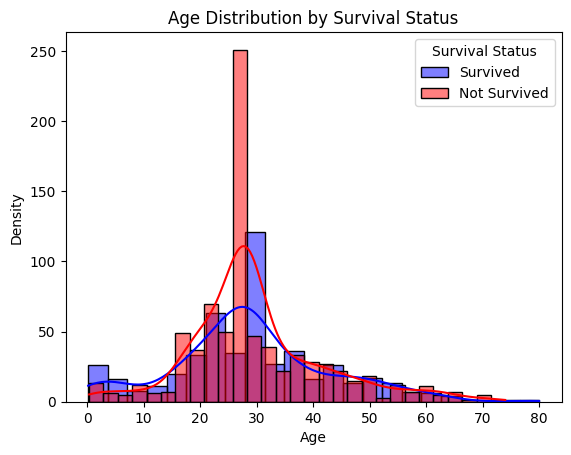

In [283]:
# Plot the age distribution for passengers who survived (blue) and those who didn't (red)
sns.histplot(data=df[df['survived'] == 1], x='age', kde=True, color='blue', label='Survived')
sns.histplot(data=df[df['survived'] == 0], x='age', kde=True, color='red', label='Not Survived')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Survival Status')
plt.legend(title='Survival Status')

plt.show()

จากกราฟจะเห็นว่าผู้โดยสารที่มีช่วงอายุประมาณ 25 - 30 ปี มีโอกาสเสียชีวิตมากที่สุด

## ML Modeling

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [285]:
from sklearn.preprocessing import LabelEncoder

# สร้างอินสแตนซ์ของ LabelEncoder
label_encoder = LabelEncoder()

# สร้างลิสต์ของคอลัมน์ที่ต้องการแปลง
columns_to_encode = ['sex','age','ticket','fare']

# ใช้ LabelEncoder เพื่อแปลงค่าในคอลัมน์ที่ระบุ
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# แสดง DataFrame หลังจากการแปลง
df

,pclass,survived,sex,age,sibsp,parch,ticket,fare
0,1,1,0,44,0,0,187,273
1,1,1,1,6,1,2,49,270
2,1,0,0,8,1,2,49,270
3,1,0,1,45,1,2,49,270
4,1,0,0,38,1,2,49,270
...,...,...,...,...,...,...,...,...
1304,3,0,0,22,1,0,259,111
1305,3,0,0,42,1,0,259,111
1306,3,0,1,40,0,0,250,18
1307,3,0,1,41,0,0,264,18


## Model Building

กำหนดตัวแปร x และ y โดยให้คอลัมน์ survived เป็นตัวแปร y คือค่าที่เราจะทำนาย

In [286]:
x = df.drop(['survived'],axis=1)
y = df['survived']

แบ่งข้อมูลเป็นชุดข้อมูลทดสอบกับชุดข้อมูลฝึก(train-test split)

In [287]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 30)

เลือก model เพื่อเอามาเปรียบเทียบว่า model ไหนเหมาะกับการนำไปสร้างตัวแบบทำนายมากที่สุด

In [288]:
models = {'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'K-Nearest Neighbors': KNeighborsClassifier(),
          'SVM Classification': SVC()
          }

In [289]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, Y_pred)
    report = classification_report(y_test, Y_pred)  # Compute classification report
    print(f"{model_name} - Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")

Decision Tree - Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       172
           1       0.63      0.67      0.65        90

    accuracy                           0.75       262
   macro avg       0.73      0.73      0.73       262
weighted avg       0.76      0.75      0.75       262


Random Forest - Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       172
           1       0.75      0.72      0.73        90

    accuracy                           0.82       262
   macro avg       0.80      0.80      0.80       262
weighted avg       0.82      0.82      0.82       262


K-Nearest Neighbors - Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       172
           1       0.58      0.53      0.55        90

    accuracy

จากผลลัพธ์ จะเห็นว่า Random Forest เป็นโมเดลที่เหมาะสมมากที่สุด เนื่องจากมี Accuracy=0.83 ซึ่งมีค่ามากที่สุดจาก model ทั้ง 3 ตัวแล้ว

In [290]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
normal = StandardScaler()

# Fit and transform the training data
new_xtrain = normal.fit_transform(X_train)

# Transform the test data using the same scaler
new_xtest = normal.transform(X_test)

In [291]:
from sklearn.ensemble import RandomForestClassifier

# สร้างแบบจำลองแบบสุ่ม
rand = RandomForestClassifier()

# ฝึกแบบจำลองด้วยข้อมูลการฝึก
rand.fit(new_xtrain, y_train)

#predicting score
rand_score = rand.score(new_xtest, y_test)
print('Score of model is : ', rand_score*100,'%')

Score of model is :  82.06106870229007 %


สร้าง object model จาก RandomForestClassifier()

In [292]:
model = RandomForestClassifier()
model

RandomForestClassifier()

In [293]:
# fit model แทนค่าเข้าได้เลย
model.fit(x, y)

RandomForestClassifier()

In [294]:
# predict X_train ดูคร่าวๆ
y_hat = model.predict(X_train)
y_hat

array([0, 1, 0, ..., 0, 1, 0])

In [295]:
# รวม X_train กับ y_train เข้าด้วยกัน
train=pd.concat([X_train, y_train], axis='columns')
train.head()

,pclass,sex,age,sibsp,parch,ticket,fare,survived
1225,3,1,84,0,0,631,111,0
980,3,0,34,0,0,474,45,1
834,3,1,48,0,0,701,57,0
275,1,0,60,1,1,105,266,1
349,2,0,36,0,0,209,100,1


In [296]:
# นำคอลัมน์ predict มาต่อท้าย
dc=pd.concat([train.reset_index(),
              pd.Series(y_hat, name='Predicted')], axis='columns')
dc.head()

,index,pclass,sex,age,sibsp,parch,ticket,fare,survived,Predicted
0,1225,3,1,84,0,0,631,111,0,0
1,980,3,0,34,0,0,474,45,1,1
2,834,3,1,48,0,0,701,57,0,0
3,275,1,0,60,1,1,105,266,1,1
4,349,2,0,36,0,0,209,100,1,1


นำข้อมูลที่เป็น test ของ X มาใช้ในการ predict

In [297]:
y_hat_test=model.predict(X_test)
y_hat_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [298]:
# join data
test=pd.concat([X_test, y_test], axis='columns')
test.head()

,pclass,sex,age,sibsp,parch,ticket,fare,survived
659,3,0,11,2,1,260,135,1
338,2,1,42,0,0,196,159,0
610,3,0,60,1,0,695,73,0
950,3,1,44,0,0,694,74,0
290,1,1,74,1,1,1,248,0


In [299]:
# นำคอลัมน์ predict มาต่อท้าย
dt=pd.concat([test.reset_index(), pd.Series(y_hat_test, name='Predicted')], axis='columns')
dt.head()

,index,pclass,sex,age,sibsp,parch,ticket,fare,survived,Predicted
0,659,3,0,11,2,1,260,135,1,1
1,338,2,1,42,0,0,196,159,0,0
2,610,3,0,60,1,0,695,73,0,0
3,950,3,1,44,0,0,694,74,0,0
4,290,1,1,74,1,1,1,248,0,0


In [300]:
dt.corr()

,index,pclass,sex,age,sibsp,parch,ticket,fare,survived,Predicted
index,1.000000,0.887085,0.134690,-0.286974,0.042708,-0.091235,0.270344,-0.679825,-0.334530,-0.334530
pclass,0.887085,1.000000,0.087776,-0.365825,0.034852,-0.040979,0.296064,-0.769286,-0.297004,-0.297004
sex,0.134690,0.087776,1.000000,0.125678,-0.060971,-0.220305,0.108976,-0.179669,-0.540517,-0.540517
age,-0.286974,-0.365825,0.125678,1.000000,-0.191271,-0.174359,-0.064215,0.171083,-0.111585,-0.111585
sibsp,0.042708,0.034852,-0.060971,-0.191271,1.000000,0.476875,0.103931,0.405956,0.031571,0.031571
parch,-0.091235,-0.040979,-0.220305,-0.174359,0.476875,1.000000,-0.001704,0.395463,0.190115,0.190115
ticket,0.270344,0.296064,0.108976,-0.064215,0.103931,-0.001704,1.000000,-0.218090,-0.174638,-0.174638
fare,-0.679825,-0.769286,-0.179669,0.171083,0.405956,0.395463,-0.218090,1.000000,0.331680,0.331680
survived,-0.334530,-0.297004,-0.540517,-0.111585,0.031571,0.190115,-0.174638,0.331680,1.000000,1.000000
Predicted,-0.334530,-0.297004,-0.540517,-0.111585,0.031571,0.190115,-0.174638,0.331680,1.000000,1.000000


จากผลลัพธ์ตารางความสัมพันธ์จะเห็นว่าค่า correlation ระหว่างตัวแปร survived และ Predicted มีค่าเท่ากับ 1 ซึ่งมีความสัมพันธ์กันมากที่สุดในทิศทางเดียวกัน หมายความว่า ตัวแบบทำนายให้ข้อมูลค่อนข้างแม่นยำเป็นอย่างมาก

## Classifier using kNN

ทำการสร้างแบบจำลอง KNN และทดสอบประสิทธิภาพของแบบจำลองบนชุดข้อมูล เพื่อเลือกค่า k ที่เหมาะสม

In [301]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

# Importing the dataset
dataset = df
#dataset = pd.read_csv('wine_data.csv')
X = dataset.iloc[:, [0, 2, 3, 4, 5, 6, 7]].values
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#KNN
# Fitting KNN to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn = []
for i in range(1,21):
    classifier = KNeighborsClassifier(n_neighbors=i)
    trained_model=classifier.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix

    cm_KNN = confusion_matrix(y_test, y_pred)
    print(cm_KNN)
    print("Accuracy score of train KNN")
    print(accuracy_score(y_train, trained_model.predict(X_train))*100)
    print("Accuracy score of test KNN")
    print(accuracy_score(y_test, y_pred)*100)
    knn.append(accuracy_score(y_test, y_pred)*100)

[[193  54]
 [ 50  96]]
Accuracy score of train KNN
99.89082969432314
Accuracy score of test KNN
73.53689567430025
[[225  22]
 [ 70  76]]
Accuracy score of train KNN
87.44541484716157
Accuracy score of test KNN
76.59033078880407
[[205  42]
 [ 43 103]]
Accuracy score of train KNN
87.22707423580786
Accuracy score of test KNN
78.37150127226464
[[221  26]
 [ 56  90]]
Accuracy score of train KNN
86.02620087336244
Accuracy score of test KNN
79.13486005089058
[[214  33]
 [ 41 105]]
Accuracy score of train KNN
85.48034934497817
Accuracy score of test KNN
81.1704834605598
[[224  23]
 [ 57  89]]
Accuracy score of train KNN
83.9519650655022
Accuracy score of test KNN
79.64376590330788
[[217  30]
 [ 43 103]]
Accuracy score of train KNN
83.9519650655022
Accuracy score of test KNN
81.42493638676844
[[226  21]
 [ 52  94]]
Accuracy score of train KNN
82.86026200873363
Accuracy score of test KNN
81.42493638676844
[[220  27]
 [ 43 103]]
Accuracy score of train KNN
82.42358078602619
Accuracy score of test

สร้างกราฟเพื่อแสดงความแม่นยำของแบบจำลอง KNN สำหรับค่า k ที่ต่างกัน และทดสอบประสิทธิภาพของแบบจำลอง SVM ด้วยชุดข้อมูลการทดสอบ เพื่อทำการประเมินประสิทธิภาพของแบบจำลอง KNN และ SVM บนชุดข้อมูล และทำให้เราทราบค่าความแม่นยำของแบบจำลองในการทำนาย

[[218  29]
 [ 50  96]]
Accuracy score of train SVM
77.18340611353712
Accuracy score of test SVM
79.89821882951654


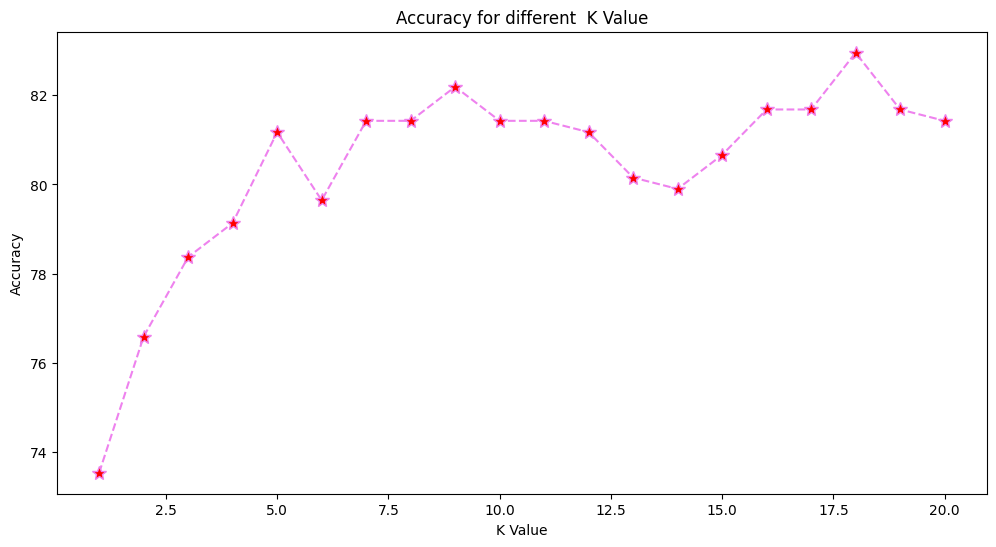

In [302]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21),knn, color='violet', linestyle='dashed', marker='*',
             markerfacecolor='red', markersize=10)
plt.title('Accuracy for different  K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
#SVM
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
trained_model=classifier.fit(X_train,y_train)
trained_model.fit(X_train,y_train )


# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_SVM = confusion_matrix(y_test, y_pred)
print(cm_SVM)
print("Accuracy score of train SVM")
print(accuracy_score(y_train, trained_model.predict(X_train))*100)

print("Accuracy score of test SVM")
print(accuracy_score(y_test, y_pred)*100)

กราฟจะแสดงความแม่นยำของแบบจำลอง KNN สำหรับค่า k ที่ต่างกัน (k = 1 ถึง 20)
โดยจะพล็อตความแม่นยำสำหรับค่า k แต่ละค่า

จากกราฟจะเห็นนว่า เมื่อ k = 18 จะให้ความแม่นยำที่ดีที่สุด

##  Classification (Decision Tree)

Accuracy: 0.7659033078880407
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.92      0.82       224
           1       0.83      0.57      0.68       169

    accuracy                           0.77       393
   macro avg       0.79      0.74      0.75       393
weighted avg       0.78      0.77      0.76       393

Confusion Matrix:
 [[205  19]
 [ 73  96]]


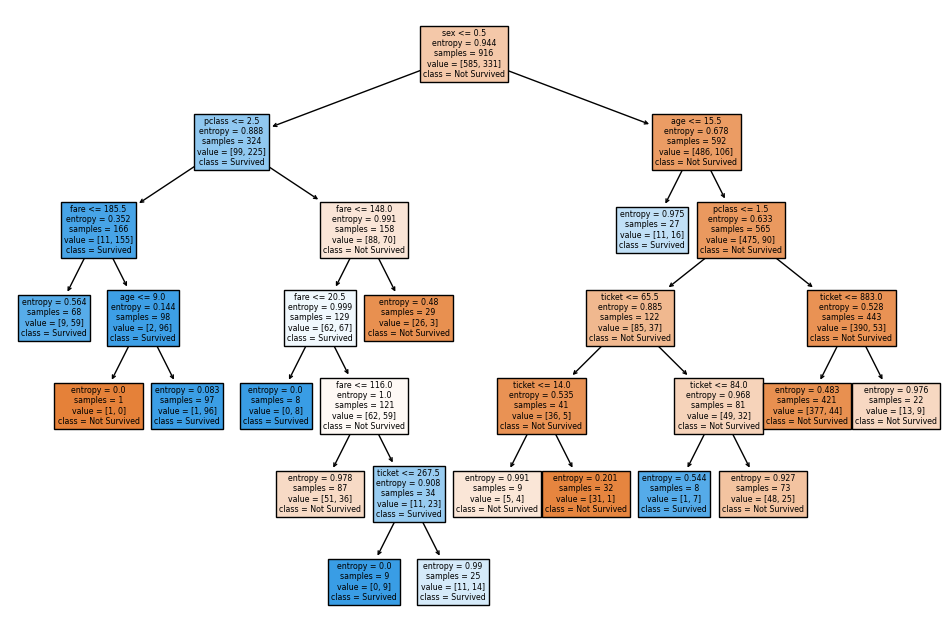

In [303]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the Titanic dataset
# You can replace 'titanic.csv' with the path to your dataset file
#pclass	survived	sex	age	sibsp	parch	ticket	fare	cabin	embarked	boat	body	home.dest
# Select the features (X) and the target variable (y)
X = df[['pclass', 'sex', 'age', 'parch', 'fare','ticket']]
y = df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=7,min_samples_split=30, max_leaf_nodes=15)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"])
plt.show()


เลือกคอลัมน์ 'pclass', 'sex', 'age', 'parch', 'fare', และ 'ticket' เป็นคุณลักษณะและ 'survived' เป็นตัวแปรเป้าหมาย

ความแม่นยำ (Accuracy) คือ 0.7659 หรือประมาณ 76.59%. ความแม่นยำแสดงสัดส่วนของการทำนายที่ถูกต้องทั้งหมดบนชุดข้อมูลทดสอบ.

รายงานการจำแนก (Classification Report) แสดงผลลัพธ์สำหรับแต่ละคลาส 0 (ไม่รอด) และ 1 (รอด) และสรุปค่าเมตริกต่าง ๆ เช่น precision, recall, f1-score และ support ดังนี้:

สำหรับคลาส 0: ความแม่นยำ 0.74, ความสามารถในการจำแนก (recall) 0.92, ค่า f1-score 0.82

สำหรับคลาส 1: ความแม่นยำ 0.83, ความสามารถในการจำแนก (recall) 0.57, ค่า f1-score 0.68

ค่าเมทริกเชิงทั่วไป (macro avg) มีค่า precision คือ 0.79,

 ความสามารถในการจำแนก (recall) คือ 0.74, และค่า f1-score คือ 0.75

ค่าเมทริกเชิงทั่วไป (weighted avg) มีค่า precision คือ 0.78,

ความสามารถใการจำแนก (recall) คือ 0.77, และค่า f1-score คือ 0.76

 Confusion Matrix แสดงจำนวนของความถูกต้องและความผิดพลาดในการทำนาย ดังนี้:


True Negative (TN): 205 รอดที่ถูกทำนายว่าไม่รอด

False Positive (FP): 19 รอดที่ถูกทำนายว่ารอด

False Negative (FN): 73 ไม่รอดที่ถูกทำนายว่ารอด

True Positive (TP): 96 ไม่รอดที่ถูกทำนายว่าไม่รอด

ดูจาก True Negative (TN) เห็นว่าโมเดลนี้ไม่ดีเท่าที่ควร

## K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


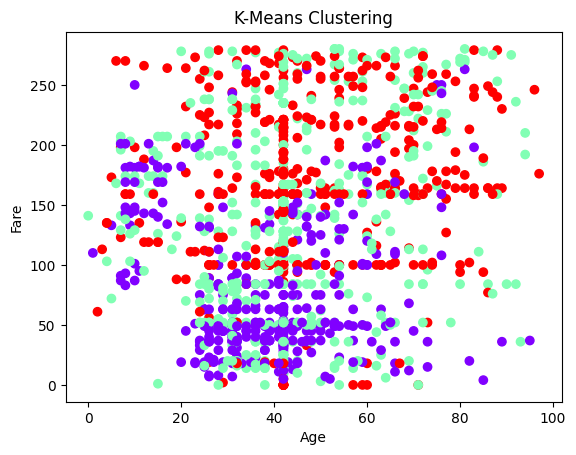

In [304]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load your dataset

# Select the features to use for clustering
X = dataset.iloc[:, [0, 2, 3, 4, 5, 6, 7]].values

# Choose the number of clusters (you can experiment with different values)
num_clusters = 3

# Create a K-Means clustering model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to your data
kmeans.fit(X)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to your dataset
dataset['cluster'] = cluster_labels

# Visualize the clusters (for 2D data)
plt.scatter(dataset['age'], dataset['fare'], c=cluster_labels, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('K-Means Clustering')
plt.show()


จากกราฟจะเห็นได้ว่ามีการกระจายที่ดีและแยกออกเป็นกลุ่มบนสีม่วงและสีแดงอย่างชัดเจน แต่ยังไม่ดีเท่าที่ควรเนื่องจากยังมีสีที่ปนกันไปตามกลุ่มอยู่